In [1]:
library(jsonlite)
library(tidyr)
library(ggplot2)
library(testthat)

Warning message:
“package ‘jsonlite’ was built under R version 4.1.2”

Attaching package: ‘testthat’


The following object is masked from ‘package:tidyr’:

    matches




In [2]:
currency_code_vector<-c('USD','JPY','BGN','CZK','DKK','GBP','HUF','PLN','RON','SEK','CHF','ISK','NOK','HRK','RUB','TRY','AUD','BRL','CAD','CNY','HKD','IDR','ILS','INR','KRW','MXN','MYR','NZD','PHP','SGD','THB','ZAR','EUR','AED','AFN','ALL','ARS','BAM','BBD','BDT','BHD','BIF','BMD','BND','BOB','BSD','BWP','BZD','CLP','COP','CRC','CUP','CVE','DJF','DOP','DZD','EGP','ETB','FJD','GHS','GNF','GTQ','HNL','HTG','IQD','JMD','JOD','KES','KHR','KWD','KYD','KZT','LAK','LBP','LKR','LSL','LYD','MAD','MDL','MGA','MKD','MMK','MOP','MUR','MVR','MWK','NAD','NGN','NIO','NPR','OMR','PAB','PEN','PGK','PKR','PYG','QAR','RSD','RWF','SAR','SCR','SDG','SOS','SVC','SZL','TND','TTD','TWD','TZS','UAH','UGX','UYU','UZS','VND','XAF','XOF','XPF','ZMW')

In [3]:
currency_time_series <- function(start,end,base="CAD") {
if(base %in% currency_code_vector == FALSE){
    warning("Invalid base currency name!")
    return ("Error")
    }
url<-paste('https://api.exchangerate.host/timeseries?start_date=',start,'&end_date=',end,'&base=',base,"&places=2",sep="")
data <- fromJSON(url)

if(data$success!=TRUE){
    warning("Error in connecting to the API!")
    return ("Error")
}
if(length(data$rates)==0){
    warning("Error in the parameter, please check!")
    return ("Error")
}

data<- as.data.frame(do.call(cbind, data$rates))
return (data)
}

In [5]:
currency_time_series("2020-01-01","2020-01-05","CAD")

,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05
,<named list>,<named list>,<named list>,<named list>,<named list>
USD,0.77,0.77,0.77,0.77,0.77
JPY,83.54,83.54,83.62,83.62,83.62
BGN,1.34,1.34,1.34,1.34,1.34
CZK,17.4,17.4,17.46,17.46,17.46
DKK,5.12,5.12,5.15,5.15,5.15
GBP,0.58,0.58,0.59,0.59,0.59
HUF,226.38,226.38,226.66,226.66,226.66
PLN,2.92,2.92,2.92,2.92,2.92
RON,3.27,3.27,3.3,3.3,3.3


In [41]:
history_trend_of_two_currency_plot<-function(start,end,base="CAD",aim="CAD"){
    data<-currency_time_series(start,end,base)
    if(length(data)==1 && data=="Error"){
        return ("Error")
    }
    if(aim %in% currency_code_vector == FALSE){
    warning("Invalid aim currency name!")
    return ("Error")
    }
    sub<-data[aim,]
    sub<-sub%>%pivot_longer(cols = everything(),names_to = "date",values_to = "currency_rate")
    sub$date<-as.Date(sub$date,'%Y-%m-%d') 
    
    title<-paste("The currency exchange rate between ",base, " and ", aim," in ",start," and ",end, " time period",sep="")
    plot <- ggplot(sub, aes(x = date, y = as.numeric(currency_rate))) +
    geom_line() +
    xlab("date") + 
    ylab("Currency rate") +
    ggtitle(title) +
    theme()
  return (plot)
}

Warning message in (function (..., deparse.level = 1) :
“number of rows of result is not a multiple of vector length (arg 1)”


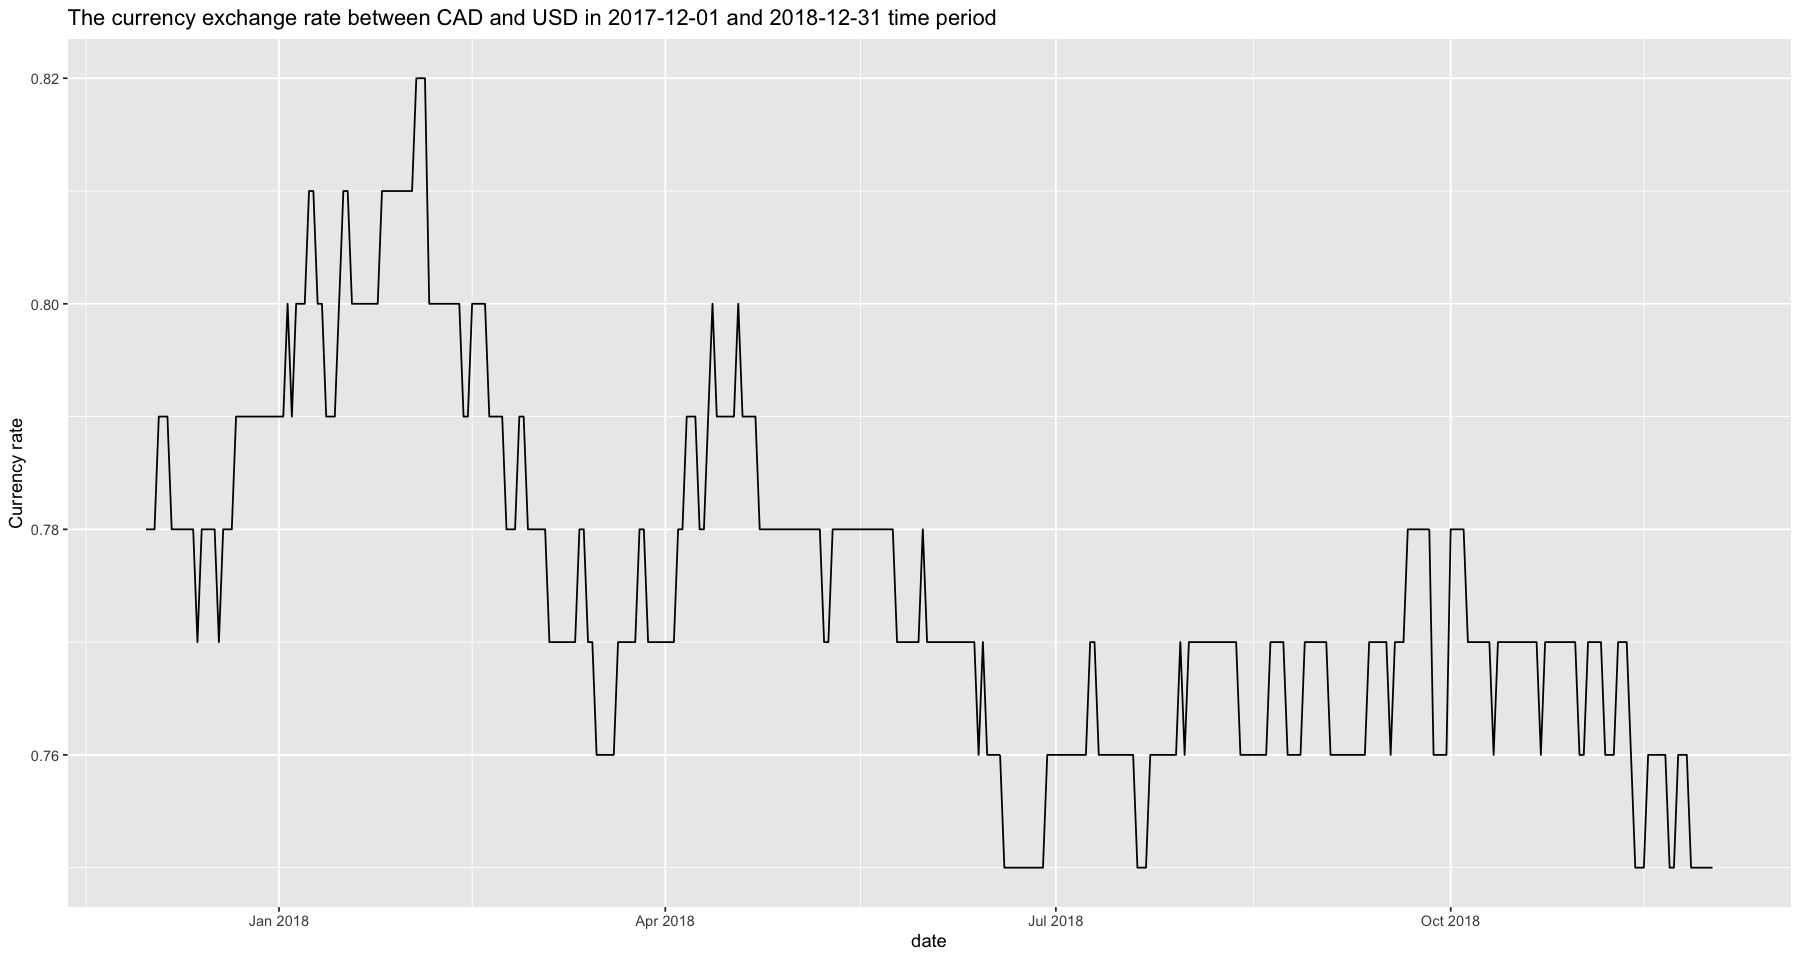

In [47]:

history_trend_of_two_currency_plot("2017-12-01","2018-12-31","CAD","USD")

Test part:

In [63]:
test_that("currency_time_series works", {
  expect_equal(typeof(currency_time_series("2020-01-01","2020-02-03","CAD")),'list')
  expect_equal(ncol(currency_time_series("2020-02-01","2020-02-03","CAD")),3)
})


Test passed 🎊


In [64]:
test_that("currency_time_series throw errors and get warnings", {
  expect_warning(currency_time_series("2020-01-01","2020-02-03","AD"))
  expect_warning(currency_time_series(2020,"2020-02-03","CAD"))
})


Test passed 🎊


In [65]:
test_that("history_trend_of_two_currency_plot works", {
  expect_equal(typeof(history_trend_of_two_currency_plot("2020-01-01","2020-02-03","CAD","USD")),'list') 
})

Test passed 😀


In [66]:
test_that("history_trend_of_two_currency_plot throw errors and get warnings", {
  expect_warning(history_trend_of_two_currency_plot("2020-01-01","2020-02-03","AD","CAD"))
  expect_warning(history_trend_of_two_currency_plot("2020-01-01","2020-02-03","CAD","AD")) 
  expect_warning(history_trend_of_two_currency_plot(2020,"2020-02-03","CAD"))
    
})

Test passed 🎊
